In [304]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, inconsistent
from scipy.cluster.hierarchy import fcluster
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import warnings   
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [273]:
# Import dataset
df_cluster = pd.read_csv('garments_worker_productivity.csv')

In [274]:
df_cluster.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [275]:
df_cluster.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [276]:
# subset dataset
columns_to_remove = ['date', 'quarter', 'department', 'day', 'team']
df = df_cluster.drop(columns=columns_to_remove)

In [284]:
df

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   targeted_productivity  1197 non-null   float64
 1   smv                    1197 non-null   float64
 2   wip                    691 non-null    float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   idle_time              1197 non-null   float64
 6   idle_men               1197 non-null   int64  
 7   no_of_style_change     1197 non-null   int64  
 8   no_of_workers          1197 non-null   float64
 9   actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 93.6 KB


In [285]:
# check for missing values
df.isnull().sum()

targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

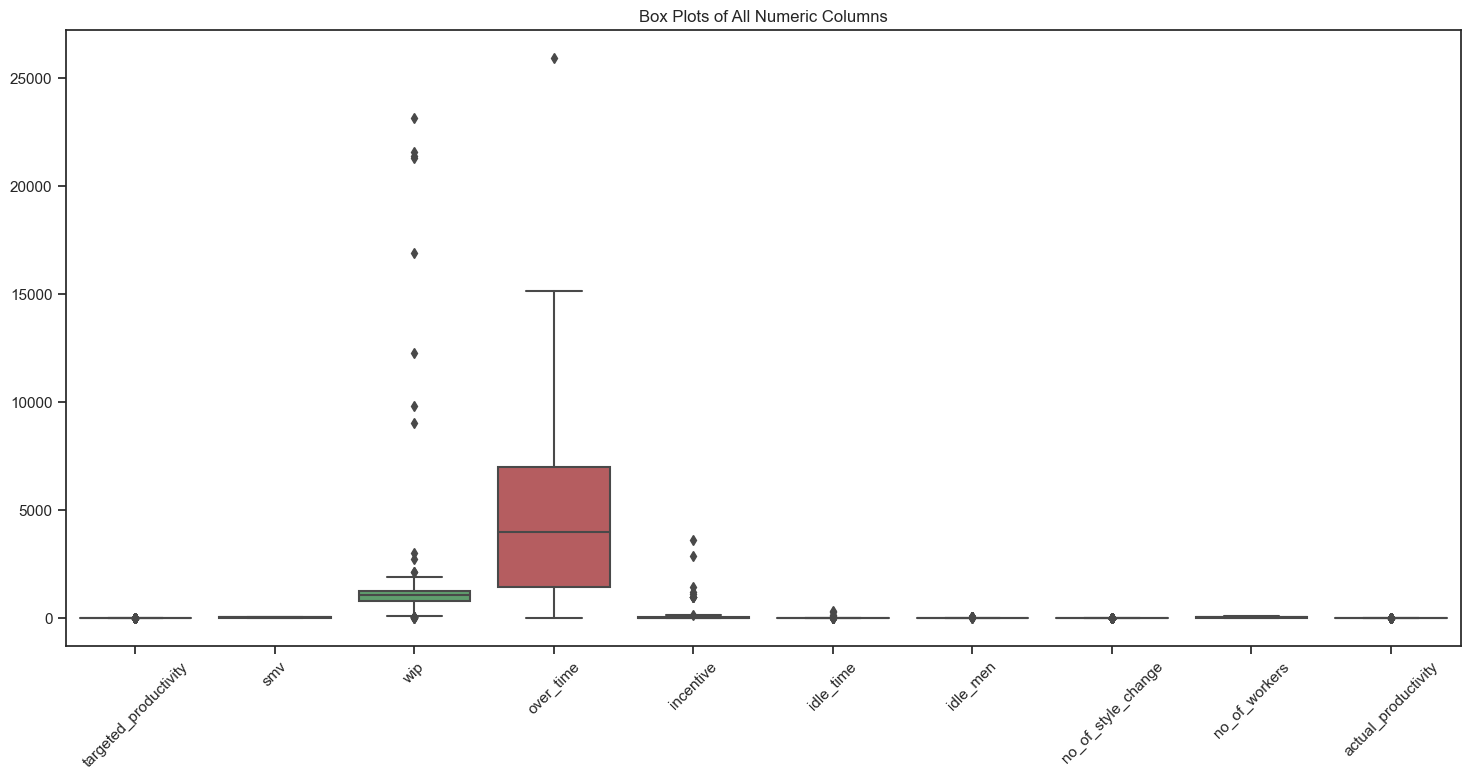

In [280]:

# Creating a boxplot for each column in the DataFrame
plt.figure(figsize=(18, 8))
sns.boxplot(data=df)

plt.xticks(rotation=45) 
plt.title('Box Plots of All Numeric Columns')
plt.show()


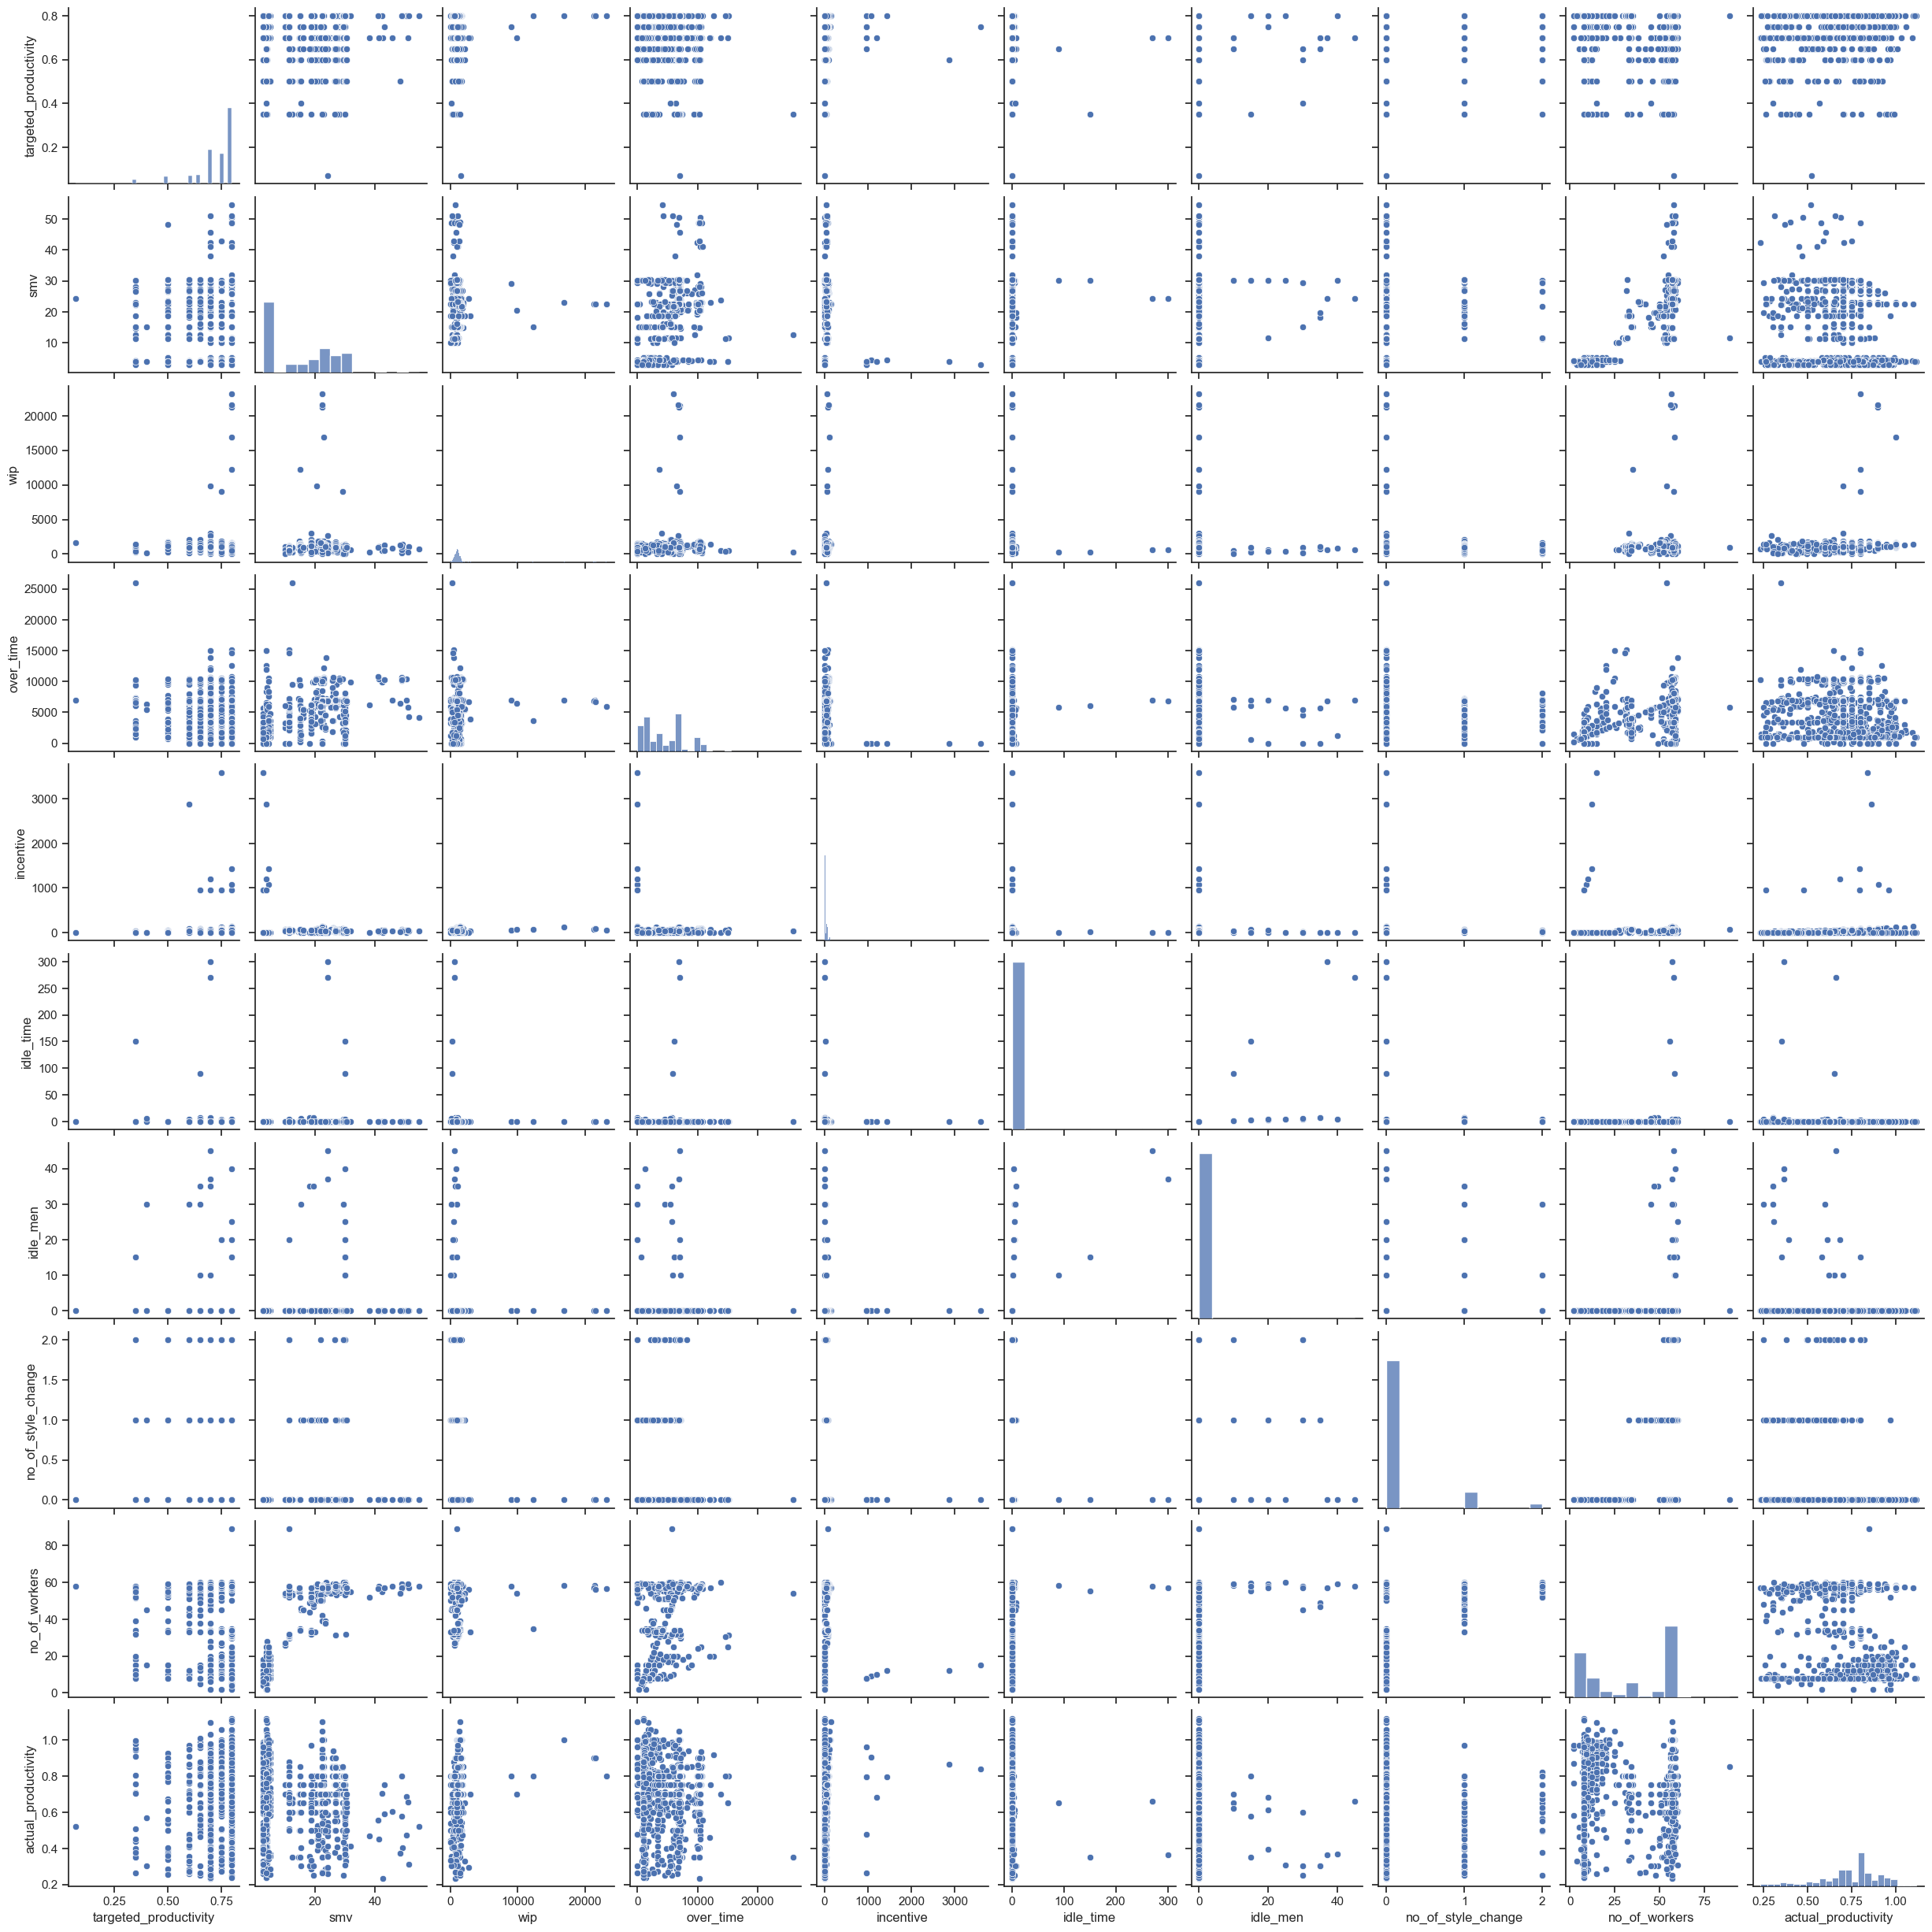

In [281]:
sns.set(style="ticks")

# Creating the pair plot
sns.pairplot(df)

plt.show()

In [286]:
df.shape

(1197, 10)

In [287]:
# replacing wip column with float value of zero
df['wip'].fillna(0.0, inplace=True)

In [288]:
df.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


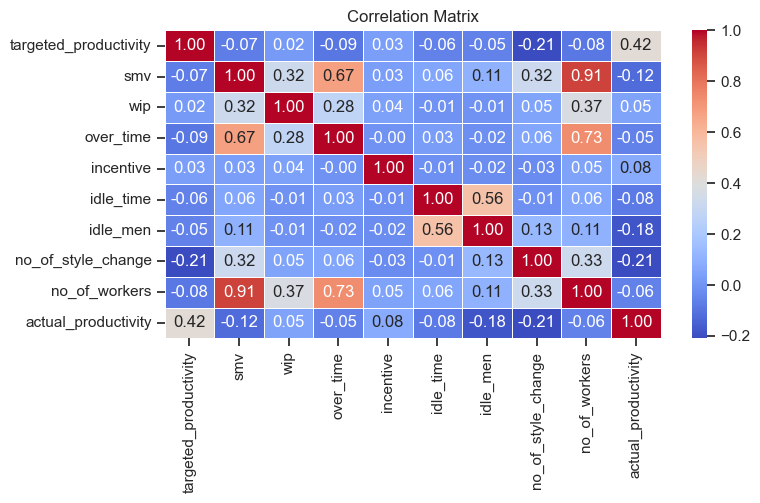

In [290]:
# plot correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

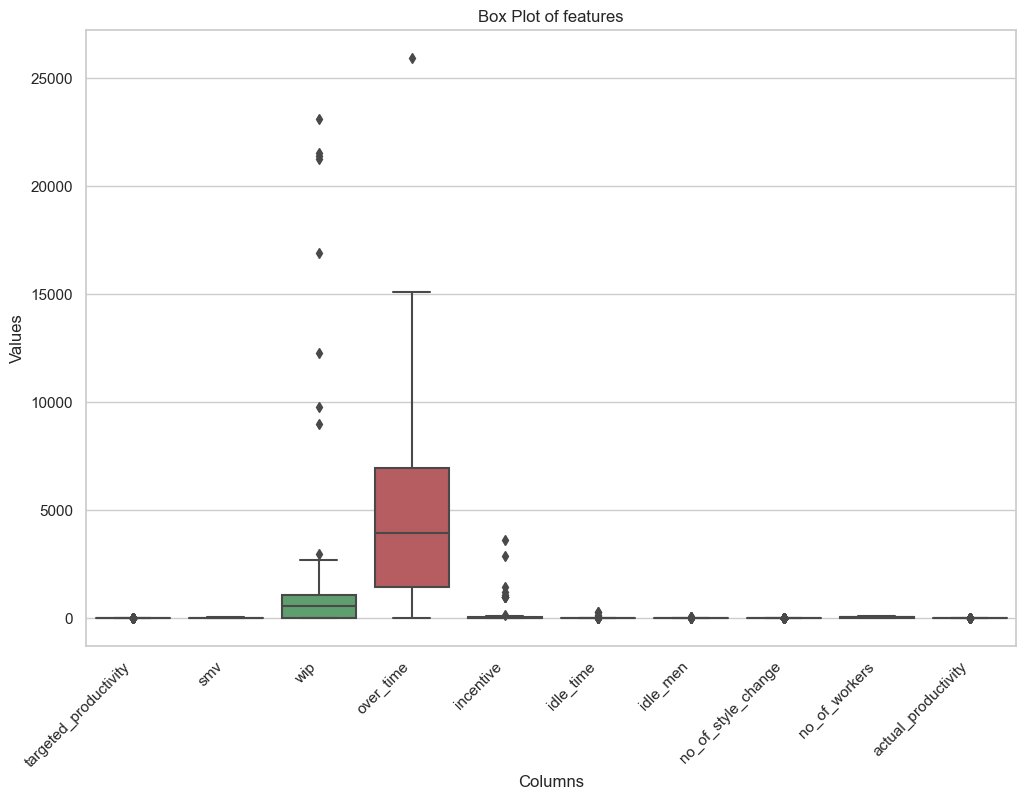

In [291]:
# Visualise outliers using box plot
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot of features')
plt.xticks(rotation=45, ha='right')
plt.show()

In [293]:
df1 = df.copy()

In [294]:
df1

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...
1192,0.75,2.90,0.0,960,0,0.0,0,0,8.0,0.628333
1193,0.70,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1194,0.65,3.90,0.0,960,0,0.0,0,0,8.0,0.625625
1195,0.75,2.90,0.0,1800,0,0.0,0,0,15.0,0.505889


In [296]:
df1.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [297]:
df1.tail()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,0.75,2.9,0.0,960,0,0.0,0,0,8.0,0.628333
1193,0.70,3.9,0.0,960,0,0.0,0,0,8.0,0.625625
1194,0.65,3.9,0.0,960,0,0.0,0,0,8.0,0.625625
1195,0.75,2.9,0.0,1800,0,0.0,0,0,15.0,0.505889
1196,0.70,2.9,0.0,720,0,0.0,0,0,6.0,0.394722


In [298]:
df1.dtypes

targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [307]:
# Standardizing 
X = df1.values
Scaler_X = StandardScaler()
X = Scaler_X.fit_transform(X)

In [308]:
# Apply PCA
pca = PCA(n_components=2)
pca_df = pca.fit_transform(X)
# Create df with the reduced dimensions
pca_df1 = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])

In [309]:
print(pca_df)

[[ 1.24834918 -1.42047943]
 [-2.08135625 -0.09273646]
 [-0.59704848 -0.54955042]
 ...
 [-1.76821792  0.97151227]
 [-1.5659426   0.83029641]
 [-1.79728507  1.41576194]]


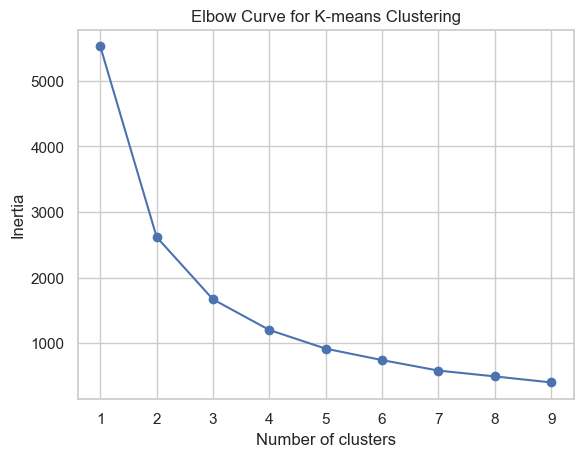

In [310]:
# Determine the optimal number of clusters for K-means using elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df1)
    inertia.append(kmeans.inertia_)
    
# Plot Elbow curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve for K-means Clustering')
plt.show()

In [311]:
# Optimal number of clusters using the silhouette score
silhouette_scores = [] 
k_values = range(2, 8)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(pca_df)
    silhouette_scores.append(silhouette_score(pca_df, kmeans_labels)) 

optimal_n_clusters = k_values[np.argmax(silhouette_scores)]


In [312]:
optimal_n_clusters

3

In [313]:
# K-means clustering using 3 no of optimal clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=0)
kmeans.fit(pca_df1)
df1['KMeans_Cluster'] = kmeans.labels_
df1['KMeans_Cluster'].value_counts()

1    598
0    586
2     13
Name: KMeans_Cluster, dtype: int64

In [314]:
df1.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,KMeans_Cluster
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,0
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [315]:
df1.tail()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,KMeans_Cluster
1192,0.75,2.9,0.0,960,0,0.0,0,0,8.0,0.628333,0
1193,0.70,3.9,0.0,960,0,0.0,0,0,8.0,0.625625,0
1194,0.65,3.9,0.0,960,0,0.0,0,0,8.0,0.625625,0
1195,0.75,2.9,0.0,1800,0,0.0,0,0,15.0,0.505889,0
1196,0.70,2.9,0.0,720,0,0.0,0,0,6.0,0.394722,0


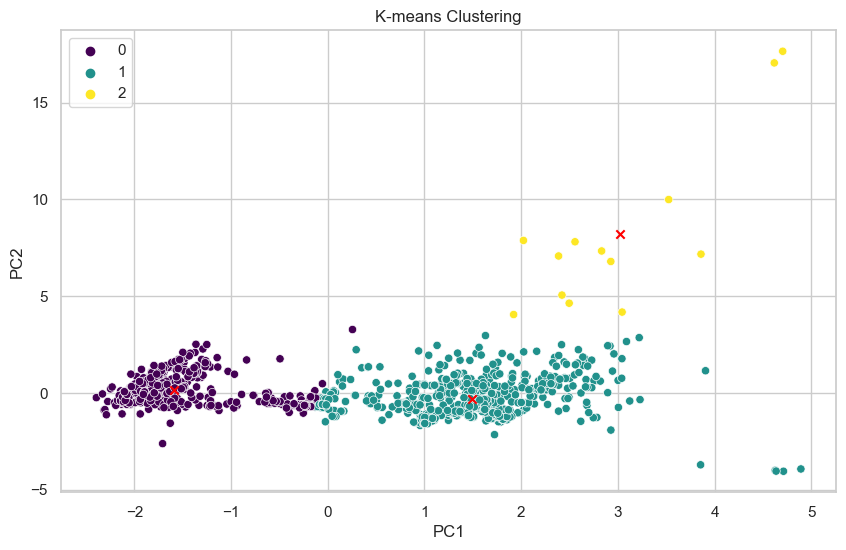

In [316]:
# plot K-means clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=kmeans.labels_, data=pca_df1, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.title('K-means Clustering')
plt.show()

In [317]:
# Dendrogram to determine the optimal number of clusters for Hierarchical clustering
linkage_matrix = linkage(pca_df1, method='ward')

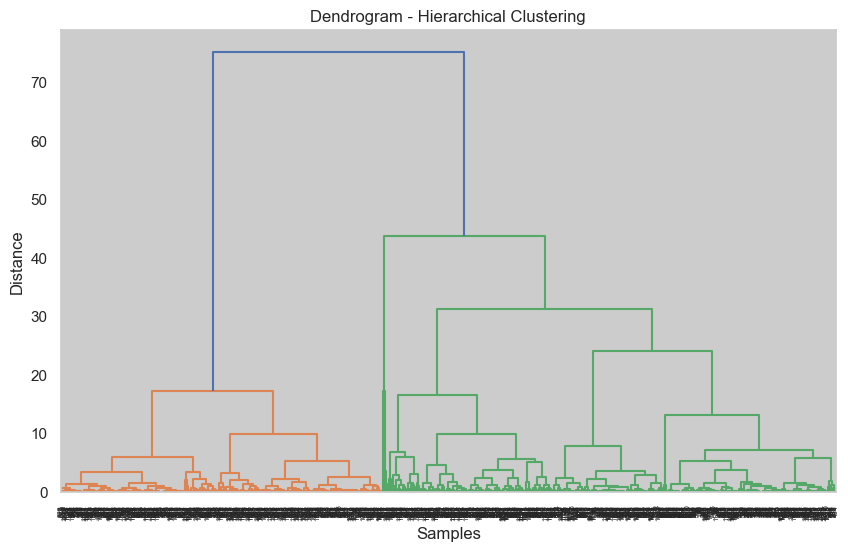

In [318]:
# Ploting  dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram - Hierarchical Clustering')
plt.show()

In [319]:
# Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(pca_df1)
df1['Hierarchical_Cluster'] = agg_clustering.labels_

In [320]:
df1.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,KMeans_Cluster,Hierarchical_Cluster
0,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,0
1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,0,1
2,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,0
3,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,0,0
4,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,0


In [321]:
df1.tail()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,KMeans_Cluster,Hierarchical_Cluster
1192,0.75,2.9,0.0,960,0,0.0,0,0,8.0,0.628333,0,1
1193,0.70,3.9,0.0,960,0,0.0,0,0,8.0,0.625625,0,1
1194,0.65,3.9,0.0,960,0,0.0,0,0,8.0,0.625625,0,1
1195,0.75,2.9,0.0,1800,0,0.0,0,0,15.0,0.505889,0,1
1196,0.70,2.9,0.0,720,0,0.0,0,0,6.0,0.394722,0,1


In [322]:
df1.Hierarchical_Cluster.value_counts()

0    691
1    497
2      9
Name: Hierarchical_Cluster, dtype: int64

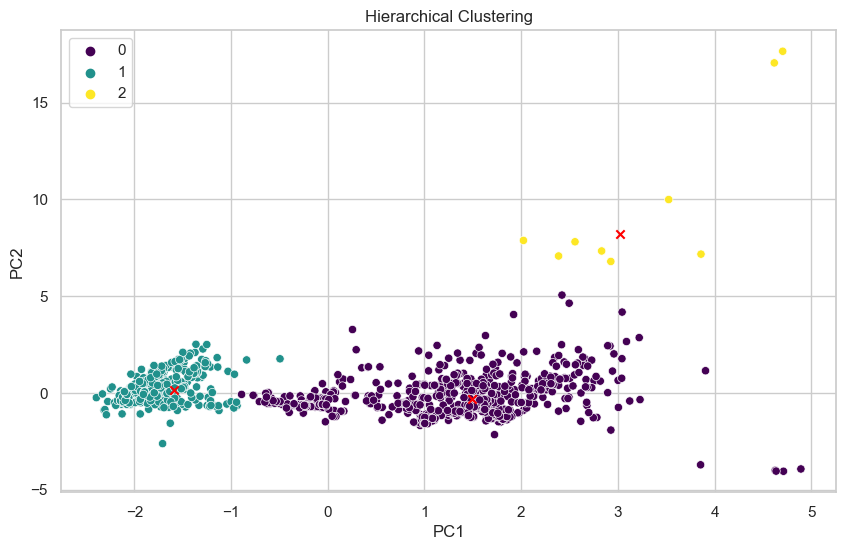

In [323]:
# Plot hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue=agg_clustering.labels_, data=pca_df1, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red')
plt.title('Hierarchical Clustering')
plt.show()

In [324]:
kmeans_silhouette = silhouette_score(pca_df, kmeans.labels_)
agg_silhouette = silhouette_score(pca_df, agg_clustering.labels_)
# Davies-Bouldin Score
kmeans_chs = calinski_harabasz_score(pca_df, kmeans.labels_) 
agg_chs = calinski_harabasz_score(pca_df, agg_clustering.labels_)

print(f"K-means Silhouette Score: {kmeans_silhouette}")
print(f"K-means Calinski-Harabasz Score: {kmeans_chs}")
print(f"Hierarchical Silhouette Score: {agg_silhouette}")
print(f"Hierarchical Calinski-Harabasz Score: {agg_chs}")

K-means Silhouette Score: 0.5858932435623606
K-means Calinski-Harabasz Score: 1380.1912531195546
Hierarchical Silhouette Score: 0.5790010335823406
Hierarchical Calinski-Harabasz Score: 1292.1875448044202


In [326]:
# Grouping clusters
grouped_kmeans = df1.groupby('KMeans_Cluster')
cluster_kmeans = grouped_kmeans.mean()
print(cluster_kmeans)

                targeted_productivity        smv          wip    over_time  \
KMeans_Cluster                                                               
0                            0.744881   5.299300   129.496587  2125.298635   
1                            0.716338  24.386171  1236.272575  6967.700669   
2                            0.653846  26.238462   572.000000  4241.538462   

                incentive  idle_time   idle_men  no_of_style_change  \
KMeans_Cluster                                                        
0               32.470990   0.006826   0.034130            0.000000   
1               44.588629   0.018395   0.083612            0.285953   
2                3.538462  66.076923  28.615385            0.692308   

                no_of_workers  actual_productivity  Hierarchical_Cluster  
KMeans_Cluster                                                            
0                   13.615188             0.758568              0.848123  
1                   54.72993